In [2]:
import math

%matplotlib inline
import matplotlib.pyplot as plt
from collections import Counter
from hypothesis import given
from hypothesis.strategies import lists, sets, integers, floats, datetimes, sampled_from
from contextlib import contextmanager
import io
import sys

SF_18_CHAR_IDS = (
 '00600000002nxMDaay','00600000002nxvTaaq', '00600000002ny2Uaaq', '00600000002okRnaai', '00600000002pObWaau', '00600000002pp1faaa', '00600000002qbSCaay',
 '00600000002qbU2aai', '00600000002qbVJaay', '00600000002sAmSaau', '00600000002tEo5aae', '006000000038DFcaam',
 '00600000003buG6aai', '00600000003bvAcaai', '00Dj0000001ticoeaa', '00600000003bvLqaai', '00600000003c4Dnaai',
 '00600000003DJ9Zaaw', '00T00000005p04beaa', '00Do0000000KjYWea0', '00T0000000bDNIAea4', '00T0000000DsS8Qeav',
 '00T0000000edZNream', '00T0000000gXy1teac', '00T0000000HRq34ead', '00T0000000hs8VMeay', '00T0000000hVn5Heas',
 '00T0000000i2tL2eai', '00T0000000jVXkqeag', '00T0000000kcVEYea2', '00T0000000kG6o6eac', '00T0000000kXnAJea0',
 '00T0000000m8nfTeaq', '00T0000000mA3A2eak', '00T0000000mfyFXeay', '01Jo00000020Wugeae', '01Jo00000020Wuheae',
 '01Jo00000020Wuieae', '01Ji000000KFi7uead', '01JA000000Ix3OGmaz', '01JA000000Ix3OLmaz', '01JA000000IxYXeman',
 '01JA000000IxYXjman', '01JA000000IxYXoman', '01JA000000IxYXtman', '01JA000000JVusAmat', '01JA000000JWi5tmad',
 '01Jb000000CLHGIea5', '01Jb000000CLHGNea5', '00DF00000004zocmaa', '00D60000000IPvgeag', '00D61000000ds5Peaq',
 '00DE0000000J7KQma0', '00D37000000I9cOeas', '00D80000000ZN5Geaw'
)

SF_15_CHAR_IDS = (
    '00600000002nxMD', '00600000002nxvT', '00600000002ny2U', '00600000002okRn', '00600000002pObW',
    '00600000002pp1f', '00600000002qbSC', '00600000002qbU2', '00600000002qbVJ', '00D80000000ZN5G',
    '00600000002sAmS', '00600000002tEo5', '006000000038DFc', '00600000003buG6', '00600000003bvAc',
    '00Dj0000001tico', '00600000003bvLq', '00600000003c4Dn', '00600000003DJ9Z', '00T00000005p04b',
    '00Do0000000KjYW', '00T0000000bDNIA', '00T0000000DsS8Q', '00T0000000edZNr', '00T0000000gXy1t',
    '00T0000000HRq34', '00T0000000hs8VM', '00T0000000hVn5H', '00T0000000i2tL2', '00T0000000jVXkq',
    '00T0000000kcVEY', '00T0000000kG6o6', '00T0000000kXnAJ', '00T0000000m8nfT', '00T0000000mA3A2',
    '00T0000000mfyFX', '01Jo00000020Wug', '01Jo00000020Wuh', '01Jo00000020Wui', '01Ji000000KFi7u',
    '01JA000000Ix3OG', '01JA000000Ix3OL', '01JA000000IxYXe', '01JA000000IxYXj', '01JA000000IxYXo',
    '01JA000000IxYXt', '01JA000000JVusA', '01JA000000JWi5t', '01Jb000000CLHGI', '01Jb000000CLHGN',
    '00DF00000004zoc', '00D60000000IPvg', '00D61000000ds5P', '00DE0000000J7KQ', '00D37000000I9cO'
)

def all_same(*items):
    if not items:
        return True
    return all(x == items[0] for x in items)

@contextmanager
def stdout_redirector(stream):
    old_stdout = sys.stdout
    sys.stdout = stream
    try:
        yield
    finally:
        sys.stdout = old_stdout

FAIL = '\033[91m'
ENDC = '\033[0m'
def print_failure_case(func):
    f = io.StringIO()
    with stdout_redirector(f):
        try:
            func()
        except Exception as e:
            pass
    res = f.getvalue()
    if res:
        print(FAIL + res + ENDC, end='')

# Property-based Testing

#### With examples in Python and JS

### aka Generative Testing


### aka "I'm too lazy to come up with test cases"

# What is property-based/generative testing?

- property-based: check that statements or invariants are true for an example
- generative: automatically generate examples

Two separate ideas, but usually practiced together.

### Instead of checking for equality...


In [3]:
def test_sort_on_example():
    assert sorted([3, 5, 18, 2, -4]) == [-4, 2, 3, 5, 18]

### Describe a property that should be true.


In [4]:
from hypothesis import given
from hypothesis.strategies import lists, integers

@given(lists(integers()))
def test_sort_produces_correct_order(a_list):
    sorted_lst = sorted(a_list)
    for ix in range(len(sorted_lst) - 1):
        assert sorted_lst[ix] <= sorted_lst[ix + 1]

## How to do property-based/generative testing

- Generate an "arbitrary example" of the input for the function under test.
  - `lists(integers())` is a generic example of a list of integers.
  - Testing libraries have built-ins for primitive types, but we'll see later how to make more complicated structures.

- Come up with "properties" of the function under test.
  - Not like 'obj.attribute'
  - More like "The output of `sorted` is a list of the same length as its input"

- Use your "arbitary example" generator to run through tons of examples. Try and find a case where the property fails.

## Why do I need a framework?

What's wrong with just `import random` or `Math.random()`?

#### A (good) generative-testing framework provides:

- 'shrink'-ability of failure cases.
  - [-389294971153641476861717385245149368395L,
     -389294971153641476861717385244970907453L,
     988,
     -88,
     1665,
     1649,
     -389294971153641476861717385245047265893L,
     ...,
     -938,
     -389294971153641476861717385244722191400L,
     -389294971153641476861717385245315066655L,
     751,
     -389294971153641476861717385244787482770L]
  - becomes [0, -1]

- specifically testing edge-cases
  - eg, `0`, `+/-Inf`, `[]`, `''`

- database of failed cases (reproducibility)
  - not yet in testcheck.js

# When is generative testing appropriate?

##  When we can come up with properties

- roundtrip computations
- "fixed-point" computations
- compare to a reference implementation
- a clear relationship between input and output
- start with an example and generalize it

#### How to come up with properties?

## Roundtrip examples -- salesforce ids

Salesforce ids come in two forms:
- case-sensitive 15-char
- case-insensitive 18-char


### Convert from 15 to 18:

1. Split the fifteen characters into three groups of five.
2. For each group of five:
3. Make a length-5 bitstring (eg `01001`) encoding whether the letter at each position is capitalized
4. Use a lookup table to map that bitstring to a letter. Tack the letter onto the end.
5. After doing this for each group of five, the last three positions of the id encode the capitalization of the rest of the string.



### Convert from 18 to 15:  do the reverse

In [5]:
def sfid_18_to_15(sf_id):
    sf_id = list(sf_id)
    for i in range(3):
        bitmask = 'abcdefghijklmnopqrstuvwxyz012345'.index(sf_id[15 + i])
        for j in range(5):
            if bitmask & (1 << j):
                sf_id[i * 5 + j] = sf_id[i * 5 + j].upper()
            else:
                sf_id[i * 5 + j] = sf_id[i * 5 + j].lower()
    return ''.join(sf_id[:15])


def sfid_15_to_18(sf_id):
    suffix = []
    for i in range(3):
        flags = 0
        for j in range(5):
            c = sf_id[i * 5 + j]
            if 'A' <= c <= 'Z':
                flags += 1 << j
        suffix.append('abcdefghijklmnopqrstuvwxyz012345'[flags])
    return sf_id + ''.join(suffix)


*Can you spot the error?*

## What can we test?



- Passing through both conversions, an 18-char id comes out the same

In [6]:
@given(sampled_from(SF_18_CHAR_IDS))
def test_18_to_15_to_18_roundtrip(sf_18_char):
    assert sf_18_char == sfid_15_to_18(sfid_18_to_15(sf_18_char))

In [7]:
test_18_to_15_to_18_roundtrip()

- Passing through both conversions, a 15-char id comes out the same


In [8]:
@given(sampled_from(SF_15_CHAR_IDS))
def test_15_to_18_to_15_roundtrip(sf_15_char):
    assert sf_15_char == sfid_18_to_15(sfid_15_to_18(sf_15_char))

In [9]:
test_15_to_18_to_15_roundtrip()

*no problems so far, maybe we're good?*

- An 18-char id should be case-insensitive

In [10]:
@given(sampled_from(SF_18_CHAR_IDS))
def test_18_char_is_case_insensitive(sf_18_char):
    assert all_same(
        sfid_18_to_15(sf_18_char),
        sfid_18_to_15(sf_18_char.lower()),
        sfid_18_to_15(sf_18_char.upper()),
        sfid_18_to_15(sf_18_char.swapcase()))


In [11]:
test_18_char_is_case_insensitive()

Falsifying example: test_18_char_is_case_insensitive(sf_18_char='00600000002nxMDaay')


ValueError: substring not found

In [12]:
# Avoiding tracebacks in the slides using this helper function, 
print_failure_case(test_18_char_is_case_insensitive)

Falsifying example: test_18_char_is_case_insensitive(sf_18_char='00600000002nxMDaay')


In [13]:
def sfid_18_to_15(sf_id):
    sf_id = list(sf_id)
    for i in range(3):
        bitmask = 'abcdefghijklmnopqrstuvwxyz012345'.index(sf_id[15 + i].lower())
         #                                                   added .lower() ^
        for j in range(5):
            if bitmask & (1 << j):
                sf_id[i * 5 + j] = sf_id[i * 5 + j].upper()
            else:
                sf_id[i * 5 + j] = sf_id[i * 5 + j].lower()
    return ''.join(sf_id[:15])


In [14]:
test_18_char_is_case_insensitive() # now it passes!

#### How to come up with properties?

## Roundtrip examples -- normalize/denormalize

In NREL/openstudio-geometry-editor, we store a geometry object like:

```javascript
{
  id: 1,
  vertices: [
    {id: 'a', x: 0, y: 16}, {id: 'b', x: 4, y: 16},
    {id: 'c', x: 0, y: 10}, {id: 'd', x: 4, y: 10},
  ],
  edges: [
    { id: 'ab', v1: 'a', v2: 'b' }, { id: 'bd', v1: 'b', v2: 'd' },
    { id: 'cd', v1: 'c', v2: 'd' }, { id: 'ac', v1: 'a', v2: 'c' },
  ],
  faces: [
    {id: 'top', edgeRefs: [
      {edge_id: 'ab', reverse: false}, {edge_id: 'bd', reverse: false},
      {edge_id: 'cd', reverse: true}, {edge_id: 'ac', reverse: true},
    ]},
  ],
}
```

#### How to come up with properties example: normalize/denormalize

Often, a denormalized structure is easier to work with:

```javascript
{
  id: 1,
  vertices: [
    {id: 'a', x: 0, y: 16}, {id: 'b', x: 4, y: 16},
    {id: 'c', x: 0, y: 10}, {id: 'd', x: 4, y: 10},
  ],
  edges: [
    { id: 'ab', v1: {id: 'a', x: 0, y: 16}, v2: {id: 'b', x: 4, y: 16} },
    { id: 'bd', v1: {id: 'b', x: 4, y: 16}, v2: {id: 'd', x: 4, y: 10} },
    { id: 'cd', v1: {id: 'c', x: 0, y: 10}, v2: {id: 'd', x: 4, y: 10} },
    { id: 'ac', v1: {id: 'a', x: 0, y: 16}, v2: {id: 'c', x: 0, y: 10} },
  ],
  faces: [
    {id: 'top', edgeRefs: [
      { edge: { id: 'ab', v1: {id: 'a', x: 0, y: 16}, v2: {id: 'b', x: 4, y: 16} },
        reverse: false },
      { edge: { id: 'bd', v1: {id: 'b', x: 4, y: 16}, v2: {id: 'd', x: 4, y: 10} },
        reverse: false },
      { edge: { id: 'cd', v1: {id: 'c', x: 0, y: 10}, v2: {id: 'd', x: 4, y: 10} },
        reverse: true },
      { edge: { id: 'ac', v1: {id: 'a', x: 0, y: 16}, v2: {id: 'c', x: 0, y: 10} },
        reverse: true },
    ]},
  ],
}```

#### How to come up with properties example: normalize/denormalize


```javascript
import { gen, check, property } from 'testcheck';

describe('denormalize', () => {
  it('is undone by normalize', () => {
    const result = check(property(
      gen.oneOf(_.values(geometryExamples)),
      (geom) => {
        assertEqual(
          geom,
          normalize(denormalize(geom)),
        );
      },
    ));
    assert(resp.result, 'Property failed to verify!');
  });
});
```

#### Aside: using testcheck.js

`check(property(...))` won't throw an error on it's own. I wrote this helper function:

```javascript
function assertProperty(...args) {
  // if last parameter is not a function, assume it's config for call to check()
  const checkConfig = _.isFunction(args[args.length - 1]) ? {} : args.pop();

  let resp = check(property(...args), checkConfig);
  if (resp.result instanceof Error) {
    resp = resp.shrunk || resp;
    console.error(`${resp.result}`);
    console.error(
      `Property failed to verify on input: ${JSON.stringify(resp.smallest || resp.fail)}`);
    throw resp.result;
  }
  assert(resp.result, `Property failed to verify! ${JSON.stringify(resp)}`);
}
```

#### How to come up with Properties?

## "Fixed-point" computations (aka 'idempotent')

### When applying a function multiple times should give the same result

Examples:

In [15]:
# sorting
@given(lists(integers()))
def test_sort_is_fixed_point(a_list):
    assert sorted(a_list) == sorted(sorted(a_list))

In [16]:
# set operations
@given(sets(integers()), sets(integers()))
def test_set_ops_are_idempotent(set1, set2):
    assert set1 & set2 == (set1 & set2) & set2
    assert set1 | set2 == (set1 | set2) | set2
    assert set1 - set2 == (set1 - set2) - set2

In [17]:
# first_day_of_quarter (a problem I had at my last job)
@given(datetimes())
def test_first_day_of_quarter_is_fixed_point(dt):
    assert (first_day_of_quarter(dt) ==
            first_day_of_quarter(first_day_of_quarter(dt)))

#### How to come up with Properties?

## Compare to reference function

### why not just *use* the reference function?


- maybe yours is faster


- maybe the reference is in another language?

In [18]:
@given(datetimes(), integers(1, 12))
def test_pg_period_string(date, base_month):
    py_string = period_string(date, 'quarter', base_month)
    db_string = fetchone('SELECT quarter_str(%s, %s)', (base_month, date))[0]
    assert py_string == db_string

- binary search is famously hard to get right, so maybe compare with a linear search?

#### How to come up with Properties?

## Describe a relationship between the inputs and the outputs

In [19]:
@given(lists(integers()), lists(integers()))
def test_list_length_is_preserved_on_addition(a, b):
    assert len(a + b) == len(a) + len(b)

#### How to come up with Properties?

## Start with an example and generalize it

```javascript
assertEqual(prime_factors(4), [2, 2])
```

Why not test that `prime_factors(some_prime * some_prime)` is `[some_prime, some_prime]`

```javascript
assertProperty(
  gen.oneOf(first10kPrimes),
  prime => assertEqual(primeFactors(prime * prime), [prime, prime]),
);
```

## An Example: merge sort


In [20]:
def merge_sort(lst):
    if len(lst) <= 1:
        return lst
    
    middle = len(lst) // 2
    left = merge_sort(lst[:middle])
    right = merge_sort(lst[middle:])
    
    return merge(left, right)

def merge(left, right):
    if not left or not right:
        # base case: one of the arrays is empty
        return left or right

    result = []
    ix, jx = 0, 0
    while ix < len(left) and jx < len(right):
        if left[ix] <= right[jx]:
            result.append(left[ix])
            ix += 1
        else:
            result.append(right[jx])
            jx += 1
    return result

#### An example: merge sort

## Let's define some tests

In [21]:
@given(lists(integers()))
def test_sort_produces_correct_order(a_list):
    sorted_lst = merge_sort(a_list)
    for ix in range(len(sorted_lst) - 1):
        assert sorted_lst[ix] <= sorted_lst[ix + 1]

@given(lists(integers()))
def test_sort_is_fixed_point(a_list):
    sorted_lst = merge_sort(a_list)
    assert sorted_lst == merge_sort(sorted_lst)

In [22]:
test_sort_produces_correct_order()
test_sort_is_fixed_point()

In [23]:
@given(lists(integers()))
def test_sort_maintains_length(a_list):
    sorted_lst = merge_sort(a_list)
    assert len(sorted_lst) == len(a_list)

In [24]:
@given(lists(integers()))
def test_sorted_list_has_same_elements(a_list):
    sorted_lst = merge_sort(a_list)
    # A Counter is a map from element of the list to the number of times
    # it appears.
    assert Counter(sorted_lst) == Counter(a_list)

In [25]:
@given(lists(integers()))
def test_sort_against_reference(a_list):
    assert merge_sort(a_list) == sorted(a_list)

#### an example: merge sort

Unfortunately, these last three all fail.

In [26]:
print_failure_case(test_sort_maintains_length)
print_failure_case(test_sorted_list_has_same_elements)
print_failure_case(test_sort_against_reference)

Falsifying example: test_sort_maintains_length(a_list=[0, 0])
Falsifying example: test_sorted_list_has_same_elements(a_list=[0, 0])
Falsifying example: test_sort_against_reference(a_list=[0, 0])


In [27]:
merge_sort([0, 0])

[0]

#### an example: merge sort

## Can you spot the error?

In [28]:
def merge(left, right):
    if not left or not right:
        # base case: one of the arrays is empty
        return left or right

    result = []
    ix, jx = 0, 0
    while ix < len(left) and jx < len(right):
        if left[ix] <= right[jx]:
            result.append(left[ix])
            ix += 1
        else:
            result.append(right[jx])
            jx += 1
    return result

We're never copying remaining elements from `left[ix:]` or `right[jx:]`.

#### an example: merge sort

In [29]:
def merge(left, right):
    if not left or not right:
        # base case: one of the arrays is empty
        return left or right

    result = []
    ix, jx = 0, 0
    while ix < len(left) and jx < len(right):
        if left[ix] <= right[jx]:
            result.append(left[ix])
            ix += 1
        else:
            result.append(right[jx])
            jx += 1
    
    # Adding this:
    result.extend(left[ix:])
    result.extend(right[jx:])
    
    return result

#### an example: merge sort

Now our tests pass...

In [30]:
test_sort_produces_correct_order()
test_sort_is_fixed_point()
test_sort_maintains_length()
test_sorted_list_has_same_elements()
test_sort_against_reference()

## How to write a generator/strategy

Besides the built in generators provided by hypothesis and testcheck.js, it's useful to create your own custom generators to make examples of your domain objects.



- hypothesis provides `builds`, that takes a function and some strategies in `*args, **kwargs`:

```python
# example from bgschiller/hangman-api
def new_puzzle(word=None):
    word = word or random.choice(WORDS)
    return {
        'word_so_far': list('_' * len(word)),
        'actual_word': word.upper(),
        'guesses': [],
    }
puzzle_strategy = builds(new_puzzle, word=sampled_from(WORDS))

puzzle_strategy.example()
#{'actual_word': 'TRACE',
# 'guesses': [],
# 'word_so_far': ['_', '_', '_', '_', '_']}
```


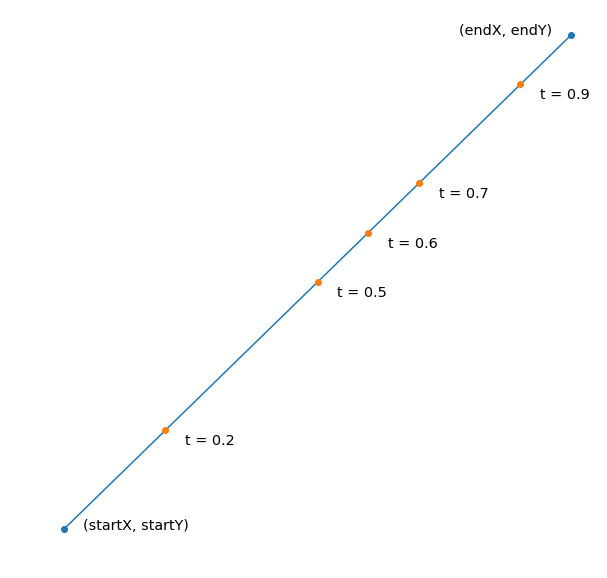

In [31]:
## Generate the explanatory picture for this slide
startX, startY = 5, -4
endX, endY = 18, 13
positionsAlong = [0.2, 0.5, 0.6, 0.7, 0.9]
pointsAlong = list(zip(
    [startX + (t * (endX - startX)) for t in positionsAlong],
    [startY + (t * (endY - startY)) for t in positionsAlong]))

fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')

ax.plot([startX, endX], [startY, endY], marker='o')
ax.plot(*zip(*pointsAlong), 'o')
for t, (x, y) in zip(positionsAlong, pointsAlong):
    ax.annotate('t = {}'.format(t), [x + 0.5, y - 0.5], fontsize='x-large')
ax.annotate('(startX, startY)', [startX + 0.5, startY], fontsize='x-large')
ax.annotate('(endX, endY)', [endX - 0.5, endY], horizontalalignment='right', fontsize='x-large')
fig.savefig('pointsAlongLine.png')

![](pointsAlongLine.png)

```javascript
  const genVertices = gen.object({
    startX: gen.numberWithin(-10000, 10000),
    startY: gen.numberWithin(-10000, 10000),
    endX: gen.numberWithin(-10000, 10000),
    endY: gen.numberWithin(-10000, 10000),
    pointsAlong: gen.array(gen.numberWithin(0, 1), { minSize: 0, maxSize: 10 }),
  })
  ```

```javascript
  .suchThat(({ startX, startY, endX, endY }) => startX !== endX || startY !== endY)
```

  ```javascript
  .then(({ startX, startY, endX, endY, pointsAlong }) => {
    const toPointOnLine = t => ({
      x: startX + (t * (endX - startX)),
      y: startY + (t * (endY - startY)),
    });
    
    const arr = [
      /* start */{ x: startX, y: startY, identity: 'start' },
      /* end */{ x: endX, y: endY, identity: 'end' },
      /* verts */
      ...pointsAlong.map(toPointOnLine),
    ];
    if (pointsAlong.length) {
      /* and a duplicate out of order for good measure */
      arr.push(toPointOnLine(pointsAlong[0]));
    }
    return arr;
  });

```

## Generator example: polygons

(I use this one in NREL/openstudio-geometry-editor). A caveats:


- not completely 'expressive'
- pretty good for testing
- (better than the 3-5 examples I would have patience to write on my own)

#### generator example: polygons

## A recipe for a polygon

1. Choose a point to be the center.
2. Choose a number of vertices, $n$.
3. For each of $n$ equal directions (eg, when $n=3$: $0^{\circ}$, $120^{\circ}$, and $240^{\circ}$)
  - Choose a distance, $d$ and plant a vertex that far away from the center in the direction chosen.

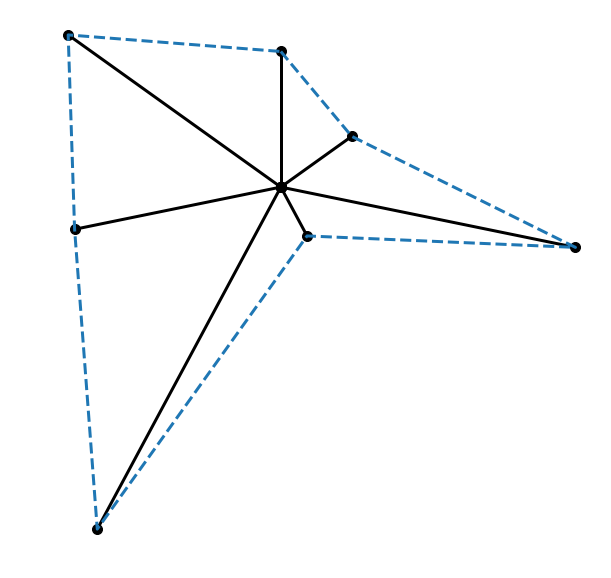

In [32]:
# generate the explanatory polygon graphic

fig, ax = plt.subplots(figsize=(5, 5))
fig.set_size_inches(10, 10)

ax.axis('off')
ax.set_xlim(192.12422853458619, 210.58856724501976)
ax.set_ylim(327.47518723099802, 347.52265683509671)

center = centerX, centerY = (200, 341)
radii = [5, 3, 10, 2, 14, 7, 9]
angle_step = 2 * math.pi / len(radii)
ax.plot(centerX, centerY, marker='o', color='k', linewidth=3, markersize=10)
pts = []

fig.savefig('createPolygon0.png')

for ix, rad in enumerate(radii):
    pt = (
        centerX + rad * math.sin(ix * angle_step),
        centerY + rad * math.cos(ix * angle_step))

    ax.plot(*zip(center, pt), marker='o', color='k', linewidth=3, markersize=10)
    pts.append(pt)
    fig.savefig('createPolygon{}.png'.format(ix + 1))

pts.append(pts[0])
ax.plot(*zip(*pts), linestyle='dashed', linewidth=3)
fig.savefig('createPolygon{}.png'.format(len(radii) + 1))

<img src="createPolygon0.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon1.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon2.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon3.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon4.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon5.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon6.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon7.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

<img src="createPolygon8.png" style=" position: fixed; top: 50%; left: 50%; transform: translate(-50%, -50%);">

generator example: polygons


```javascript
const createIrregularPolygon = ({ center, radii }) => {
  const angleStep = (2 * Math.PI) / radii.length;

  return radii
    .map((radius, n) => ({
      x: center.x + (radius * Math.sin(n * angleStep)),
      y: center.y + (radius * Math.cos(n * angleStep)),
    }));
};
```



```javascript
const genIrregularPolygon = gen.object({
  center: gen.object({ x: gen.int, y: gen.int }),
  radii: gen.array(gen.intWithin(5, 100), { minSize: 3, maxSize: 20 }),
})
.then(createIrregularPolygon);
```

## Throwing away examples

- Hypothesis has `assume`
- testcheck has `suchThat`

In [33]:
# an example from the hypothesis docs
@given(floats())
def test_negation_is_self_inverse(x):
    assert x == -(-x)

print_failure_case(test_negation_is_self_inverse)

Falsifying example: test_negation_is_self_inverse(x=nan)


In [34]:
from hypothesis import assume
from math import isnan

# an example from the hypothesis docs
@given(floats())
def test_negation_is_self_inverse(x):
    assume(not isnan(x))
    assert x == -(-x)

print_failure_case(test_negation_is_self_inverse)

#### Throwing away examples

testcheck has `.suchThat()`

```javascript
const genPoint = gen.object({ x: gen.int, y: gen.int });

const genTriangle = gen.array(genPoint, { size: 3 })
  .suchThat(pts => !ptsAreCollinear(...pts));
```

#### Throwing away examples

## Be careful using `assume` and `suchThat`

- There is a performance cost
- If the requirement is too hard (improbable) to satisfy, an exception is thrown
- Often, it's possible to make your generator more specific instead:

```javascript
const genEvenNumber = gen.int.suchThat(n => n % 2 === 0);
```

```javascript
const genEvenNumber = gen.int.then(n => n * 2);
```

## That's it!

#### Sources

- [hypothesis.readthedocs.io](https://hypothesis.readthedocs.io/en/latest/)
- [leebyron.com/testcheck-js/](http://leebyron.com/testcheck-js/)
- [jeffhui.net/2015/07-generative-testing.html](https://www.jeffhui.net/2015/07-generative-testing.html)
- [8thlight.com/blog/connor-mendenhall/2013/10/31/check-your-work.html](https://8thlight.com/blog/connor-mendenhall/2013/10/31/check-your-work.html)
- [hypothesis.works/articles/testing-performance-optimizations/](http://hypothesis.works/articles/testing-performance-optimizations/)
- [hypothesis.works/articles/encode-decode-invariant/](http://hypothesis.works/articles/encode-decode-invariant/)